In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PLOTS_FOLDER = "../plots"

In [4]:
labels_df = pd.read_csv("../data/tatoeba_train_labels.csv", index_col=0)

labels_df.head()

,label
line_idx,
1155,good
1439,good
1504,context
2701,good
3811,good


In [5]:
THRESH = 0.15

feature_df = pd.read_csv(f"../data/tatoeba_tf_train_thresh{THRESH}.tsv", sep="\t", index_col=0)

feature_df.head()

,l0_h0_wcc,l0_h0_scc,l0_h0_sc,l0_h0_b1,l0_h0_avd,l0_h1_wcc,l0_h1_scc,l0_h1_sc,l0_h1_b1,l0_h1_avd,...,l5_h6_wcc,l5_h6_scc,l5_h6_sc,l5_h6_b1,l5_h6_avd,l5_h7_wcc,l5_h7_scc,l5_h7_sc,l5_h7_b1,l5_h7_avd
line_idx,,,,,,,,,,,,,,,,,,,,,
0,5,27,0,3,1.851852,9,27,0,7,1.851852,...,4,27,0,5,2.074074,7,27,0,3,1.703704
1,4,27,0,4,2.000000,8,27,0,6,1.851852,...,8,27,0,1,1.481481,7,27,0,2,1.629630
2,7,30,0,3,1.733333,11,30,0,2,1.400000,...,8,30,0,2,1.600000,10,30,0,2,1.466667
3,6,15,0,0,1.200000,7,15,0,0,1.066667,...,6,15,0,3,1.600000,6,15,0,2,1.466667
4,4,14,0,3,1.857143,5,14,0,0,1.285714,...,4,14,0,2,1.714286,6,14,0,0,1.142857


In [6]:
labels_df = labels_df.join(feature_df)

Remove constant features

In [7]:
unique_cnts = labels_df.nunique(axis=0)
const_feats = unique_cnts[unique_cnts == 1]

labels_df.drop(const_feats.index.tolist(), axis=1, inplace=True)

In [8]:
X = labels_df.drop("label", axis=1)
y = labels_df.label

y, encode_keys = pd.factorize(y)

In [9]:
from sklearn.manifold import TSNE

In [10]:
tsne = TSNE(n_components=2, perplexity=20)

X_tsne = tsne.fit_transform(X)

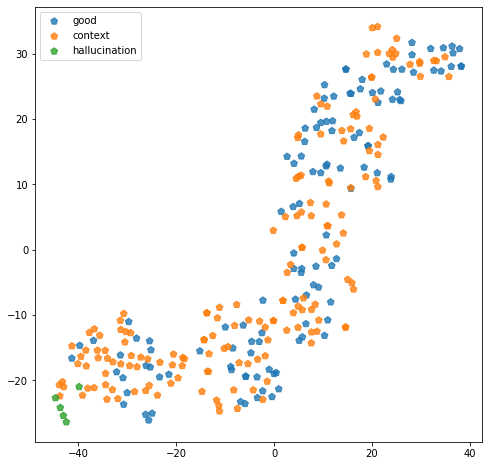

In [11]:
plt.figure(figsize=(8, 8))

colors = ['tab:blue', 'tab:orange', 'tab:green']

for i, (cls_name, clr) in enumerate(zip(encode_keys, colors)):
    plt.scatter(
        X_tsne[y == i, 0], X_tsne[y == i, 1], 
        c=np.full((y == i).sum(), clr), 
        alpha=0.8,
        marker="p", s=50,
        label=cls_name
    )

plt.legend()

plt.show()